# Taller: Análisis Estadístico y Modelado Predictivo con Python

## 1. Introducción

El análisis de datos es una herramienta fundamental para comprender fenómenos en áreas como la salud pública, la economía, la sociología y muchas más. Este taller se centra en el manejo y análisis de datos utilizando Python, con énfasis en técnicas estadísticas y de regresión aplicables a problemas reales.

Trabajaremos con bases de datos similares a las proporcionadas por el Ministerio de Salud de Chile (MINSAL), como registros de egresos hospitalarios. Aprenderemos a preparar, explorar, visualizar y modelar datos de forma sistemática, extraer conclusiones y generar predicciones a partir de la información disponible.

## 2. Objetivos
Al finalizar este taller, los y las estudiantes serán capaces de:

* Codificación y tratamiento de datos
    - Detectar y manejar valores faltantes.
    - Realizar imputaciones simples y avanzadas (KNN).
    - Transformar variables categóricas con codificación dummie.
* Análisis descriptivo y exploratorio
    - Calcular estadísticas descriptivas como media, mediana, moda y desviación estándar.
    - Estimar porcentajes de datos dentro de ciertos rangos de dispersión.
    - Visualizar variables categóricas y cuantitativas con gráficos adecuados (barras, histogramas, boxplots).
* Relación entre variables
    - Calcular coeficientes de correlación de Pearson y Spearman.
    - Interpretar gráficamente relaciones con scatter plots y matrices de correlación.
* Modelamiento estadístico
    - Ajustar modelos de regresión lineal simple y múltiple.
    - Diagnosticar supuestos de regresión mediante residuos y gráficos.
    - Realizar predicciones a partir de modelos lineales.
    - Implementar modelos de regresión logística para variables binarias.


## 3. Dataset

La Encuesta Nacional de Salud (ENS) 2016-2017 es un estudio representativo a nivel nacional que permite conocer el estado de salud de la población chilena, así como sus determinantes y el acceso a servicios de salud. Este levantamiento de datos incluye información detallada sobre factores de riesgo, enfermedades crónicas, estilos de vida, estado nutricional, salud mental, uso de servicios de salud, entre otros aspectos relevantes.

Los datos recolectados permiten caracterizar el perfil epidemiológico del país y sirven como insumo fundamental para el diseño y evaluación de políticas públicas en salud. Los datos se encuentran [disponibles públicamente](https://data.mendeley.com/datasets/3myh3nzcy3/1).

<div style="text-align:center;">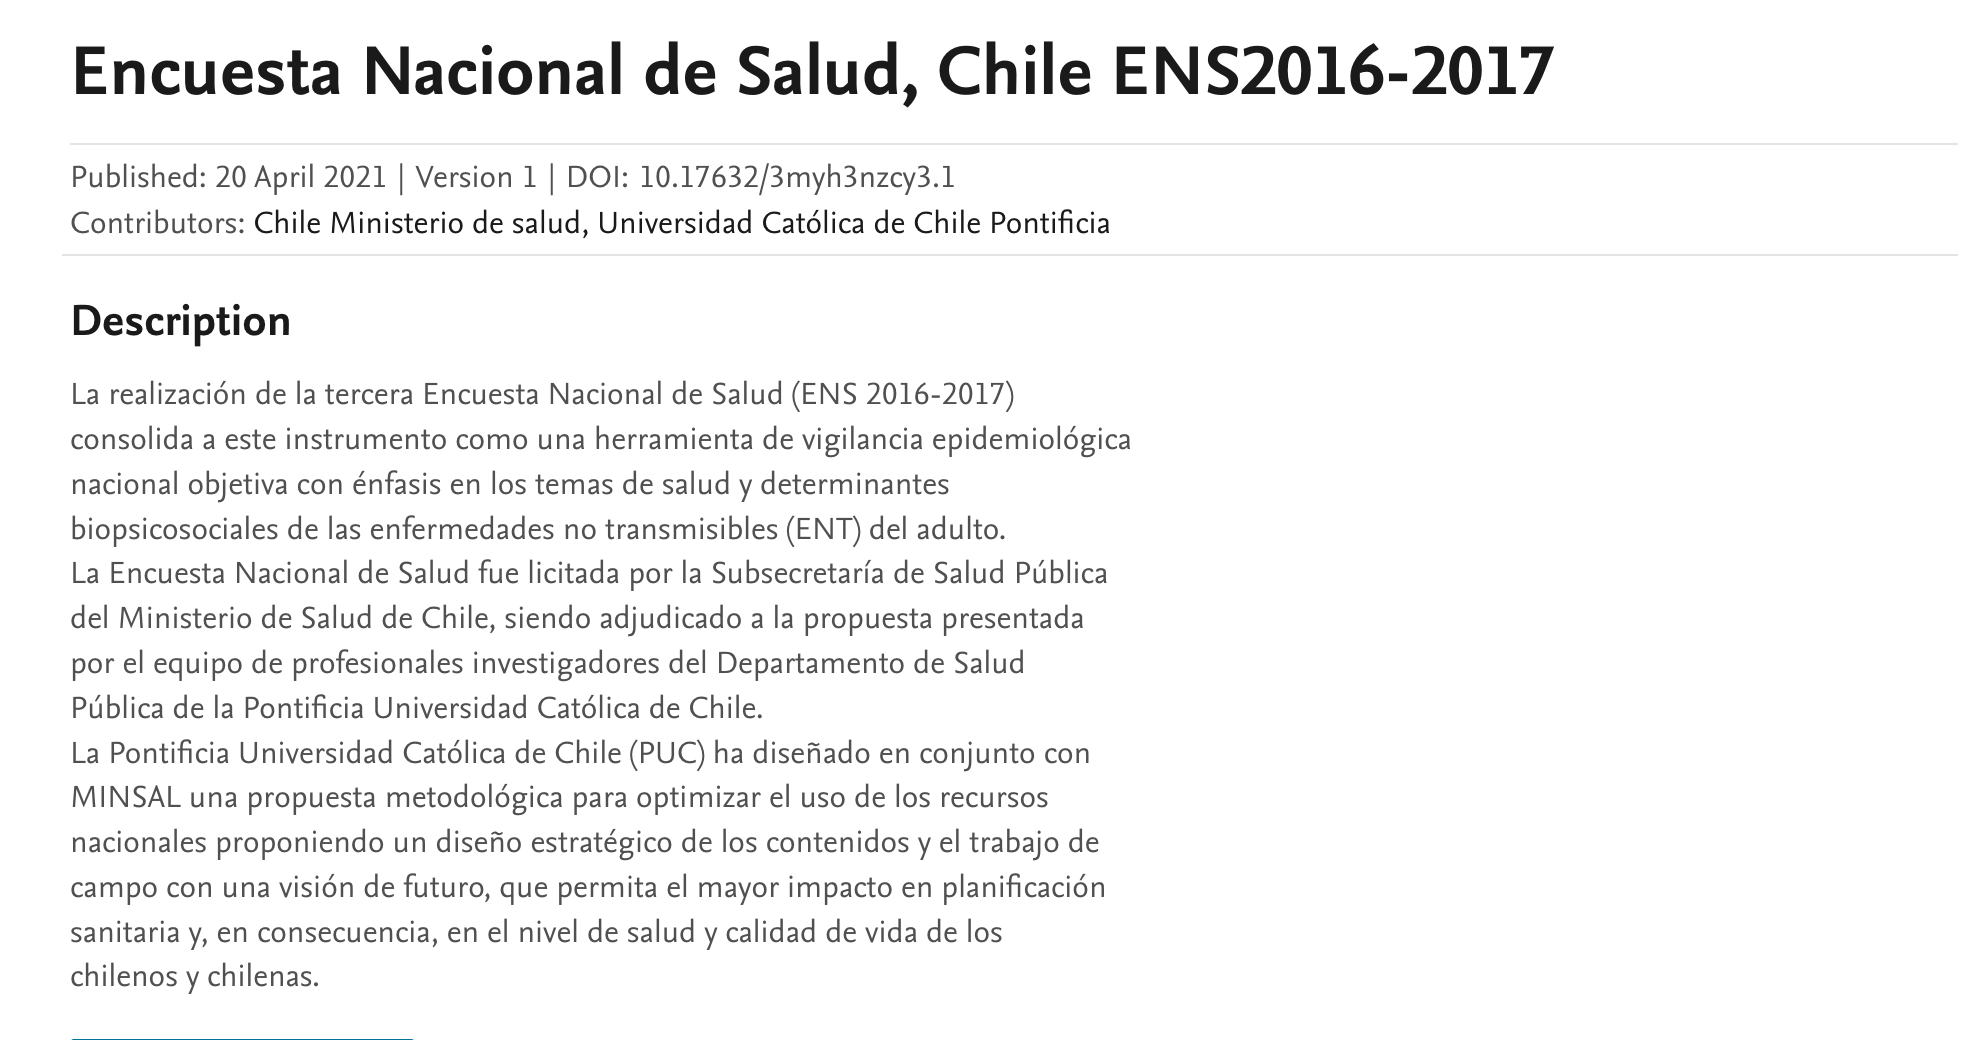</div>

### 3.1 Carga de datos

Google Colab funciona en un ambiente de nube basado en linux, por lo que podemos utilizar de manera directa commandos de linux para descargar. En este caso, utilizaremos el comando `!wget` para descargar el archivo `ENS2016-2017.sav`.

In [474]:
# Descargar ENS
!wget https://github.com/cgvalle/Diplomado_iHealth_Talleres/raw/refs/heads/main/Curso_2/data/ENS2016-2017.sav

--2025-07-02 11:48:35--  https://github.com/cgvalle/Diplomado_iHealth_Talleres/raw/refs/heads/main/Curso_2/data/ENS2016-2017.sav
Resolviendo github.com (github.com)... 20.201.28.151
Conectando con github.com (github.com)[20.201.28.151]:443... conectado.
Petición HTTP enviada, esperando respuesta... 302 Found
Localización: https://raw.githubusercontent.com/cgvalle/Diplomado_iHealth_Talleres/refs/heads/main/Curso_2/data/ENS2016-2017.sav [siguiendo]
--2025-07-02 11:48:35--  https://raw.githubusercontent.com/cgvalle/Diplomado_iHealth_Talleres/refs/heads/main/Curso_2/data/ENS2016-2017.sav
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[185.199.111.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 34441286 (33M) [application/octet-stream]
Grabando a: «ENS2016-2017.sav.8»

ENS2016-2017.sav.8  100%[=================

### 3.2 Librerías necesarias

Las siguientes librerías son necesarias para el análisis de datos y la visualización.



In [475]:
%%capture
# Instalar librerias para leer archivos SPSS
!pip install pyreadstat

In [476]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

#### **Ejercicio 1** 
Antes de comenzar, es necesario cargar los datos de egresos hospitalarios. Utiliza la variable `ens` para almacenar el DataFrame que contiene los datos de la encuesta (`ENS2016-2017.sav`). HINT: Los datos se encuentran en formato SPSS, por lo que es necesario utilizar otra función de pandas para leerlos.




In [477]:
# <CODE> 
ens = pd.read_spss('ENS2016-2017.sav')
print(ens.head())
print(ens.shape)

   IdEncuesta  FechaInicioF1               Region    Comuna    Zona  \
0     20006.0   1.369894e+10  XIII. Metropolitana  Santiago  URBANA   
1     20008.0   1.369964e+10  XIII. Metropolitana  Santiago  URBANA   
2     20011.0   1.369955e+10  XIII. Metropolitana  Santiago  URBANA   
3     20012.0   1.369903e+10  XIII. Metropolitana  Santiago  URBANA   
4     20013.0   1.369902e+10  XIII. Metropolitana  Santiago  URBANA   

   IdSegmento  IdPersona_1      Ident7  Edad Edad_Codificada  ...  \
0  13101101.0        241.0  1977-12-18  38.0         25 - 44  ...   
1  13101101.0        197.0  1991-10-23  25.0         25 - 44  ...   
2  13101102.0        321.0  1996-05-31  20.0           15-24  ...   
3  13101102.0        245.0  1931-04-14  85.0             65+  ...   
4  13101102.0        242.0  1975-06-24  41.0         25 - 44  ...   

  fg_CKDschwartz_diminuido_60 fg_CKDschwartz_diminuido_30 Fechaini_F1  \
0                         NaN                         NaN  2016-11-19   
1           

#### **Ejercicio 2** 
Identifique para cada una de las variables el porcentaje de datos faltantes. HINT: Utilice la función `isnull()` de pandas para identificar los datos faltantes y luego calcule el porcentaje de datos faltantes para cada variable.



In [478]:
# <CODE>
porcentaje_faltantes = ens.isnull().mean() * 100
print(porcentaje_faltantes.sort_values(ascending=False))

o3c_10_esp             100.000000
m6p13                  100.000000
c7_5_niño               99.983956
n4_6                    99.983956
c7_5_cuidador           99.983956
                          ...    
h2                       0.000000
h8_esp                   0.000000
h8_esp_sinCodificar      0.000000
h10_1_esp                0.000000
IdEncuesta               0.000000
Length: 1165, dtype: float64


#### **Ejercicio 3** 
Elimine completamente aquellas filas que contengan datos faltantes en una o más de sus columnas. Indique cuántas filas fueron eliminadas como resultado. Cree una variable `ens_limpia` que contenga el DataFrame resultante de esta operación.

In [479]:
# <CODE>
# Número de filas en el dataset original
filas_antes = ens.shape[0]

# Crear una nueva variable con las filas sin datos faltantes
ens_limpio = ens.dropna()

# Número de filas en el nuevo dataset
filas_despues = ens_limpio.shape[0]

# Calcular cuántas filas fueron eliminadas
filas_eliminadas = filas_antes - filas_despues

print(f"Se eliminaron {filas_eliminadas} filas con datos faltantes.")

print("Se eliminaron todas las filas del dataset, por lo que el nuevo dataset está vacío.")

Se eliminaron 6233 filas con datos faltantes.
Se eliminaron todas las filas del dataset, por lo que el nuevo dataset está vacío.


#### **Ejercicio 4** 
Como vimos en clase, los datos faltantes pueden ser tratados mediante técnicas de imputación. Una imputación simple consiste en reemplazar los valores faltantes por un valor estimado, como la media o la mediana de la variable. 

Para este ejercicio, identifique las variables numéricas en las que el porcentaje de valores faltantes sea menor al 2%. Luego, realice una imputación simple, reemplazando los datos faltantes por la media de cada variable seleccionada. Al finalizar, almacene el nuevo DataFrame en una variable distinta para conservar la información original.

In [480]:
# <CODE>

# Crear una copia del dataset original para trabajar con la imputación
ens_imputado = ens.copy()

# Calcular el porcentaje de valores faltantes por variable
porcentaje_na = ens_imputado.isna().mean()

# Filtrar las variables que tienen menos del 2% de datos faltantes
variables_con_bajos_na = porcentaje_na[porcentaje_na < 0.02].index

# Seleccionar solo las variables numéricas de ese grupo
variables_numericas = ens_imputado[variables_con_bajos_na].select_dtypes(include='number').columns

# Reemplazar los NaN de esas columnas con la media
ens_imputado[variables_numericas] = ens_imputado[variables_numericas].fillna(ens_imputado[variables_numericas].mean())

print("Imputación completada en las siguientes variables:")
print(list(variables_numericas))

Imputación completada en las siguientes variables:
['IdEncuesta', 'FechaInicioF1', 'IdSegmento', 'IdPersona_1', 'Edad', 'c3', 'cd8_corr', 'die12_cantidad', 'die12e', 'die13_cantidad', 'die13e', 'ts5_aux', 'ts6_aux', 'af2e_esp', 'n_per', 'Conglomerado', 'Estrato', 'Fexp_F1p_Corr', 'anos_estudio_MINSAL_1']


#### **Ejercicio 5** 
Una vez realizada la imputación, verifique nuevamente la presencia de datos faltantes en el DataFrame resultante.  
¿Quedan variables con valores faltantes? En caso afirmativo, ¿cuáles son y qué porcentaje de datos faltantes tiene cada una?

In [481]:
# <CODE>
# Calcular el porcentaje de datos faltantes en cada variable
porcentaje_faltantes_restantes = ens_imputado.isna().mean() * 100

# Filtrar solo las variables que aún tienen datos faltantes
faltantes_resumen = porcentaje_faltantes_restantes[porcentaje_faltantes_restantes > 0]

# Mostrar resultados
print("Aún existen datos faltantes en las siguientes variables:")
print(faltantes_resumen.sort_values(ascending=False))
print("Las variables que fueron imputadas son aquellas que tenían menos del 2% de datos faltantes y son numéricas.")
print("Por lo tanto, las variables que aún tienen datos faltantes son aquellas que no cumplen con estos criterios.")

Aún existen datos faltantes en las siguientes variables:
m6p13         100.000000
o3c_10_esp    100.000000
c7_5_niño      99.983956
n4_6           99.983956
m9p4B          99.983956
                 ...    
h4              0.160436
h5              0.160436
die11           0.080218
as11_1          0.032087
af1i            0.016044
Length: 793, dtype: float64
Las variables que fueron imputadas son aquellas que tenían menos del 2% de datos faltantes y son numéricas.
Por lo tanto, las variables que aún tienen datos faltantes son aquellas que no cumplen con estos criterios.


#### **Ejercicio 6** 
Para las variables que presentan un porcentaje de datos faltantes mayor al 2% y menor o igual al 10%, realice una imputación avanzada utilizando el método KNN (k-nearest neighbors).  

Para ello, utilice la función KNN disponible en la librería `fancyimpute` y el metodo `KNN`. Recuerde que este método solo funciona con datos numéricos; por lo tanto, primero transforme las variables categóricas mediante codificación dummy (one-hot encoding).  

Al finalizar, almacene el resultado en un nuevo DataFrame `ens_imputado_knn` para conservar el original sin modificaciones.

In [482]:
# <CODE> Instalar librerias para imputación KNN
!pip install fancyimpute

In [483]:
# <CODE> Desarrollo
from fancyimpute import KNN

# 1. Crear una copia del DataFrame original
ens_knn = ens.copy()

# 2. Identificar porcentaje de valores faltantes
faltantes_pct = ens_knn.isna().mean()

# 3. Seleccionar variables con más del 2% de valores faltantes
columnas_knn = faltantes_pct[(faltantes_pct > 0.02) & (faltantes_pct <= 0.10)].index

# 4. Filtrar columnas seleccionadas (con +2% NA)
datos_filtrados = ens_knn[columnas_knn]

# 5. Convertir variables categóricas a variables dummie (solo para estas columnas)
datos_dummies = pd.get_dummies(datos_filtrados, drop_first=True)

# 6. Aplicar imputación KNN
# Aplicar KNN imputation (por defecto k=5)
datos_imputados = KNN().fit_transform(datos_dummies.values)

# 7. Crear nuevo DataFrame con los resultados imputados
ens_imputado_knn = pd.DataFrame(datos_imputados, columns=datos_dummies.columns)

# 8. Mostrar resultados
print("Imputación KNN completada en las siguientes variables (faltantes > 2%):")
print(list(columnas_knn))

/opt/anaconda3/envs/diplomado/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/diplomado/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/diplomado/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/6233 with 0 missing, elapsed time: 6.841
Imputing row 101/6233 with 0 missing, elapsed time: 6.843
Imputing row 201/6233 with 0 missing, elapsed time: 6.843
Imputing row 301/6233 with 0 missing, elapsed time: 6.844
Imputing row 401/6233 with 0 missing, elapsed time: 6.844
Imputing row 501/6233 with 1 missing, elapsed time: 6.845
Imputing row 601/6233 with 0 missing, elapsed time: 6.846
Imputing row 701/6233 with 0 missing, elapsed time: 6.846
Imputing row 801/6233 with 0 missing, elapsed time: 6.847
Imputing row 901/6233 with 0 missing, elapsed time: 6.847
Imputing row 1001/6233 with 0 missing, elapsed time: 6.848
Imputing row 1101/6233 with 0 missing, elapsed time: 6.848
Imputing row 1201/6233 with 0 missing, elapsed time: 6.849
Imputing row 1301/6233 with 0 missing, elapsed time: 6.849
Imputing row 1401/6233 with 0 missing, elapsed time: 6.850
Imputing row 1501/6233 with 1 missing, elapsed time: 6.850
Imputing row 1601/6233 with 0 missing, elapsed time: 6.850
Imputing 

#### **Ejercicio 7** 
Realice un diagnóstico de los datos faltantes en el conjunto de datos `ens_imputado_knn`.  
Calcule el porcentaje de valores faltantes para cada variable del DataFrame. Ordene los resultados de mayor a menor y muestre únicamente aquellas variables que tienen algún porcentaje de datos faltantes (> 0%).  


In [484]:
# <CODE>
# Calcular porcentaje de datos faltantes por columna
porcentaje_faltantes = ens_imputado_knn.isna().mean() * 100

# Filtrar solo variables con algún dato faltante (> 0%)
variables_con_faltantes = porcentaje_faltantes[porcentaje_faltantes > 0]

# Ordenar de mayor a menor
variables_con_faltantes = variables_con_faltantes.sort_values(ascending=False)

# Mostrar resultados
print("Porcentaje de datos faltantes por variable (solo aquellas con NA):")
print(variables_con_faltantes)

Porcentaje de datos faltantes por variable (solo aquellas con NA):
Series([], dtype: float64)


## 4. Visualización de datos


La visualización de datos es una herramienta fundamental para explorar y comprender un conjunto de datos. A través de gráficos, es posible identificar patrones, distribuciones, valores atípicos y relaciones entre variables de forma más intuitiva y eficiente que con resúmenes numéricos.

En esta sección, utilizaremos distintos tipos de gráficos según el tipo de variable:

- Gráficos de barras: son particularmente útiles para representar variables categóricas, mostrando la frecuencia o proporción de cada categoría.
  
- Histogramas: permiten explorar la distribución de variables cuantitativas, observando su forma (asimetría, normalidad, etc.) y dispersión.

- Diagramas de caja (boxplots): sirven para comparar distribuciones y detectar outliers en variables numéricas, especialmente cuando se analizan en función de una variable categórica.



#### **Ejercicio 8** 
Visualice la distribución de una o más variables categóricas del conjunto de datos original (`ens`) mediante gráficos de barras.

1. Identifique 3 variables categóricas en el dataset. Considere como variables categóricas aquellas de tipo category.
3. Para cada variable seleccionada, genere un gráfico de barras que muestre la frecuencia absoluta (conteo) de cada categoría. Este tipo de visualización es útil para conocer la composición de la muestra en variables como sexo, nivel educacional, zona geográfica, etc.

In [485]:
# <CODE> Variables categóricas
for v in ens.select_dtypes(include='category').columns:
    print(v)

Region
Zona
Edad_Codificada
Sexo
c1
c2a
c2b
c3a
c3b
c3c
c5
c5b
c6
c7_0_niño
e1
e2a
e2b
e2c
e2d
e3_1
e3_2
e3_3
e4_1
e4_2
e4_3
e4_4
e4_5
e5_1
e5_2
e5_3
e6_1
e6_2
e6_3
e7
t9
t9_2
t10a
t10b
t10c
t10d
t10e
t10f
t10g
t10h
t10i
t10j
t10k
cd1
cd2
cd3
cd4
cd5
cd6
cd7
cd8
cd9a_1
cd9a_2
cd9a_3
cd9a_4
cd9a_5
cd9a_6
cd9a_7
cd9a_8
cd9a_9
cd9a_10
cd9a_11
cd9a_12
cd9a_13
cd9a_14
cd9a_15
cd9a_16
cd9a_17
cd9a_18
cd9a_19
cd9a_20
cd9a_21
cd9a_22
cd9a_23
cd9a_24
a1
a2
a3a
a3b
a4
a5
a6a
a6b
a7
a8
a9a
a9b
a10
a11
a12a
a12b
a13
a14
a15a
a15b
a16a
a16b
a17
a18
a19
d1_F1
d2_F1
d3_1
d3_2
d3_3
d3_4
d3_5
d3_6
d4
d5
d6
d7
v1
v2
v3
v4
v5
v6
v7
v8_1
v8_2
v8_3
v8_4
v8_5
v8_6
v8_7
au1_F1
au2_F1
au3_F1
au4_F1
au5_F1
au6_F1
au7_F1
sm1
sm2_1
sm2_2
sm2_3
sm2_4
sm2_5
sm2_6
sm2_7
sm2_8
sm2_9
sm2_10
sm2_11
sm2_12
sm2_13
sm2_14
sm2_15
sm2_16
sm3
sm4
sm5a
sm5b
sm5c
sm6_1
sm6_2
sm6_3
sm6_4
sm6_5
sm6_6
sm6_7
sm6_8
sm6_9
sm6_10
sm6_11
sm6_12
sm7
sm8
sm9
sd1_F1
sd2_F1
sd3_F1
sd4_F1
sd5_F1
sd6_F1
sd8_F1
sd9_F1
sd10_F1
sd11_F1
sd12_F

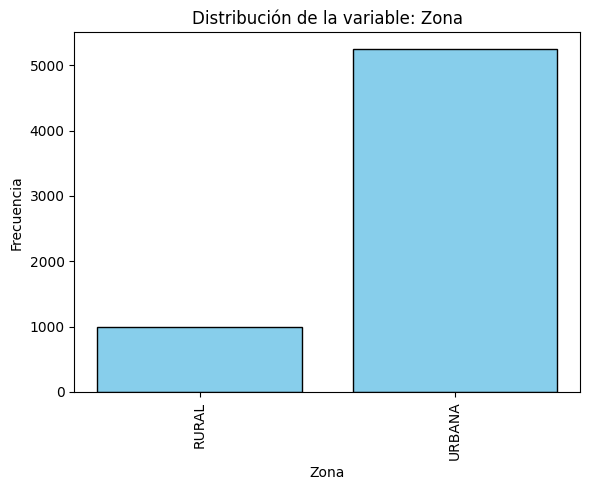

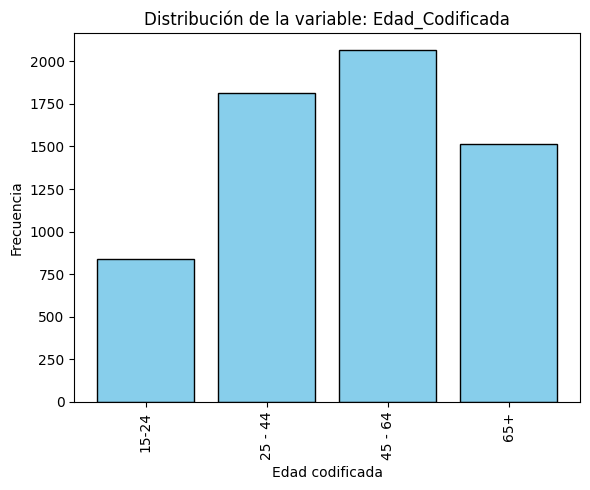

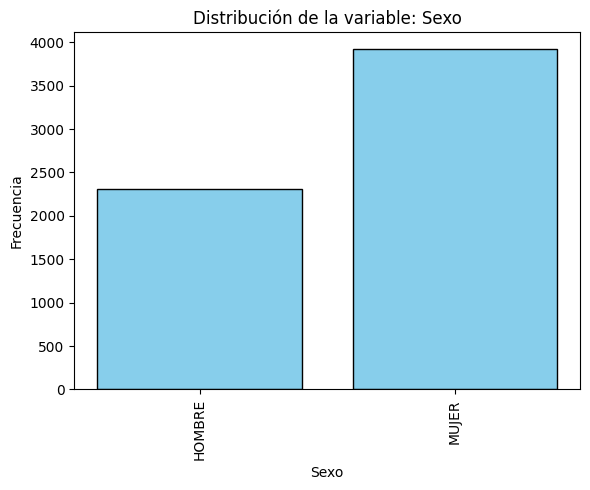

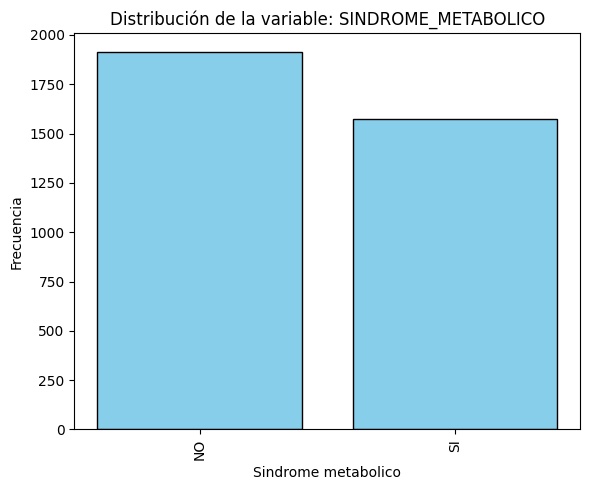

In [486]:
# <CODE>
variables_categoricas = ['Zona', 'Edad_Codificada', 'Sexo', 'SINDROME_METABOLICO']

# Crear gráfico de barras para cada variable categórica seleccionada (sin seaborn)
for col in variables_categoricas:
    # Obtener los conteos por categoría
    conteos = ens[col].value_counts().sort_values(ascending=False)
    conteos = conteos.sort_index()

    # Crear gráfica
    plt.figure(figsize=(6, 5))
    plt.bar(conteos.index.astype(str), conteos.values, color="skyblue", edgecolor="black")
    plt.title(f"Distribución de la variable: {col}")
    plt.xlabel(col.replace('_', ' ').capitalize())
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

#### **Ejercicio 9** 
Realice histogramas para explorar la distribución de variables cuantitativas del conjunto de datos.

1. Identifique al menos una variable numérica continua (como edad, presión arterial, IMC, etc.) en el dataset ENS.
2. Genere un histograma para visualizar la distribución de dicha variable.
3. Analice la forma de la distribución: ¿es simétrica? ¿tiene sesgo? ¿presenta valores extremos?



In [487]:
# <CODE>
for v in ens.select_dtypes(include='number').columns:
    print(v)

IdEncuesta
FechaInicioF1
IdSegmento
IdPersona_1
Edad
c2
c3
c7_1_niño
c7_1_cuidador
c7_2_niño
c7_2_cuidador
c7_3_niño
c7_3_cuidador
c7_4_niño
c7_4_cuidador
c7_5_niño
c7_5_cuidador
cd8_corr
sd7_F1
sd19_F1
o2_esp
o3c_10_esp
die7
die9
die12_cantidad
die12e
die13_cantidad
die13e
ts5_aux
ts6_aux
ta14_1b
ta14_2b
ta14_3b
ta14_4b
ta14_6b
ta14_7b
ta18_esp
af2a_esp
af2b_esp
af2c_esp
af2d_esp
af2e_esp
as17_1
as18_1
IdPersona_2
Edad_2
as17_2
as18_2
IdPersona_3
Edad_3
as17_3
as18_3
n_per
h6_v7
h7_v7
h8_v7
h9_1_v7
h9_2_v7
h9_3_v7
h10_1_v7
h10a_1_v7
h10b_1_v7
h10_2_v7
h10a_2_v7
h10b_2_v7
h10_3_v7
h10a_3_v7
h10b_3_v7
FechaInicioF2
m2p3
m2p5_1
m2p7_1
m2p7_2
mgstp4
mgstp5
mgstp6
mgstp7
mgstp8
mgstp9
m3p4
m6p9
m6p10
m6p11
m7p10b
v_25_OH_Vitamina_D2
aux_25_OH_Vitamina_D2
v_25_OH_Vitamina_D2_D3
v_25_OH_Vitamina_D3
aux_Anticuerpos_Anti_Peptido_C
aux_Anticuerpos_Anti_Peroxidasa
aux_B_Anticuerpos_anti_Tryp_c_
Arsenico_ENS
Cadmio_ENS
Colesterol_HDL
Colesterol_LDL_Calculado
Colesterol_No_HDL_Calculado
Colesterol

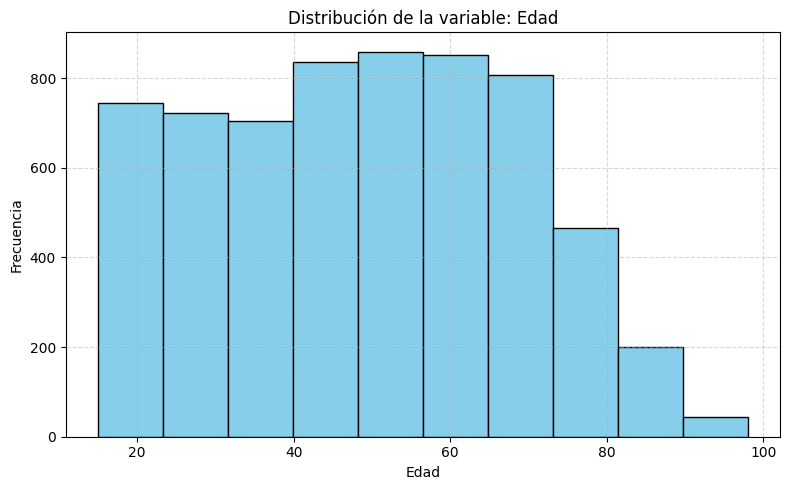

In [488]:
# <CODE>
# Seleccionar la variable cuantitativa que deseamos graficar
variable_cuantitativa = 'Edad'  # Puedes reemplazar por 'Edad', 'Presion_arterial', etc.

# Eliminar valores faltantes para evitar errores al graficar
datos = ens[variable_cuantitativa].dropna()

# Crear histograma
plt.figure(figsize=(8, 5))
plt.hist(datos, color='skyblue', edgecolor='black')
plt.title(f"Distribución de la variable: {variable_cuantitativa}")
plt.xlabel(variable_cuantitativa)
plt.ylabel("Frecuencia")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### **Ejercicio 10** 
Modifique el número de intervalos (bins) del histograma para mejorar la visualización de la forma de la distribución de una variable cuantitativa.

1. Utilice la misma variable continua del ejercicio anterior (por ejemplo: IMC, Edad, etc.).
2. Genere al menos dos histogramas utilizando diferentes cantidades de bins (por ejemplo, 10, 20 y 40).
3. Compare cómo cambia la interpretación visual de la distribución dependiendo del número de bins utilizados.



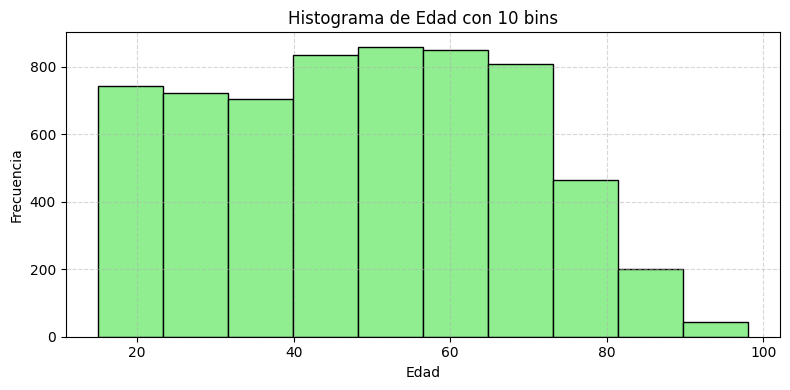

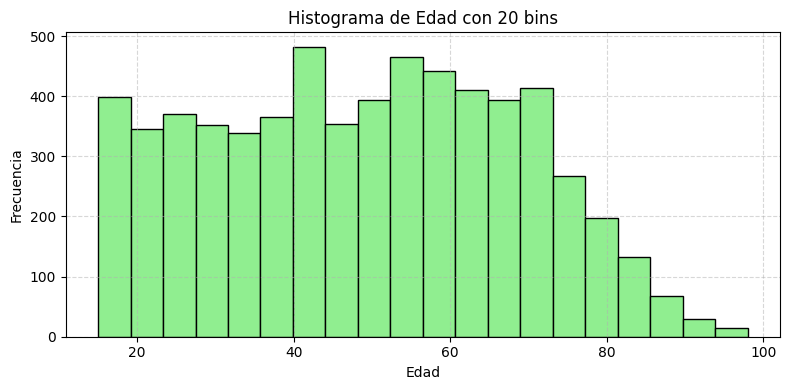

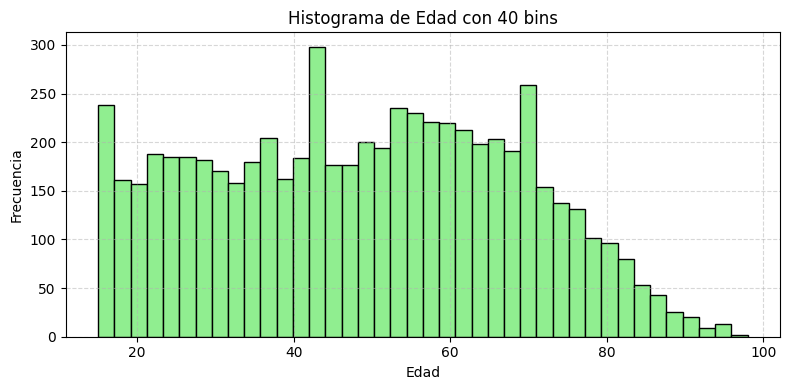

In [489]:
# <CODE>

# Variable cuantitativa a analizar
variable_cuantitativa = 'Edad'  # Puedes cambiarla por 'Edad', etc.

# Eliminar valores faltantes
datos = ens[variable_cuantitativa].dropna()

# Bins a comparar
bins_list = [10, 20, 40]

# Crear gráficos comparativos
for bins in bins_list:
    plt.figure(figsize=(8, 4))
    plt.hist(datos, bins=bins, color='lightgreen', edgecolor='black')
    plt.title(f"Histograma de {variable_cuantitativa} con {bins} bins")
    plt.xlabel(variable_cuantitativa)
    plt.ylabel("Frecuencia")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

#### **Ejercicio 11** 
Cree un gráfico tipo boxplot para analizar visualmente la distribución de la variable Glucosa.

1. Utilice la variable cuantitativa `Glucosa` del conjunto de datos ENS.
2. Genere un boxplot que permita identificar la dispersión, simetría y posibles valores atípicos.
3. Observe el gráfico y comente:  
   - ¿La caja está centrada o desplazada?
   - ¿Existen valores extremos (outliers)?
   - ¿La distribución parece simétrica o sesgada?



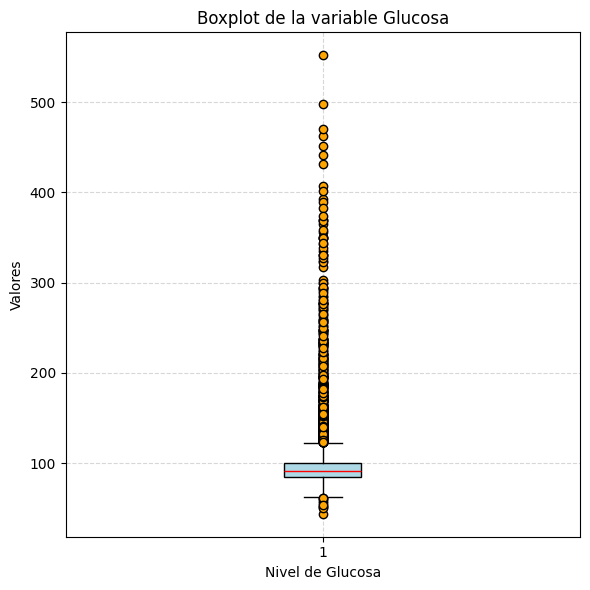

In [490]:
# <CODE>    
# Variable a graficar
variable = 'Glucosa'

# Eliminar valores faltantes
datos = ens[variable].dropna()

# Crear el boxplot
plt.figure(figsize=(6, 6))
plt.boxplot(datos, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red'),
            flierprops=dict(markerfacecolor='orange', marker='o'))

plt.title(f"Boxplot de la variable {variable}")
plt.xlabel("Nivel de Glucosa")
plt.ylabel("Valores")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### **Ejercicio 12** 
Elimine los valores atípicos de una variable cuantitativa utilizando el criterio del rango intercuartílico (IQR).

1. Utilice la variable Glucosa del conjunto de datos ENS.
2. Identifique los valores atípicos según la siguiente regla:
   - Calcule el primer cuartil (Q1) y el tercer cuartil (Q3) de la variable.
   - Calcule el rango intercuartílico (IQR = Q3 - Q1).
   - Considere como outliers aquellos valores menores a Q1 - 1.5×IQR o mayores a Q3 + 1.5×IQR.
3. Cree una nueva versión del DataFrame sin estos valores atípicos.
4. Reporte cuántos registros fueron eliminados.


Se eliminaron 1600 registros con valores atípicos en la variable 'Glucosa'.


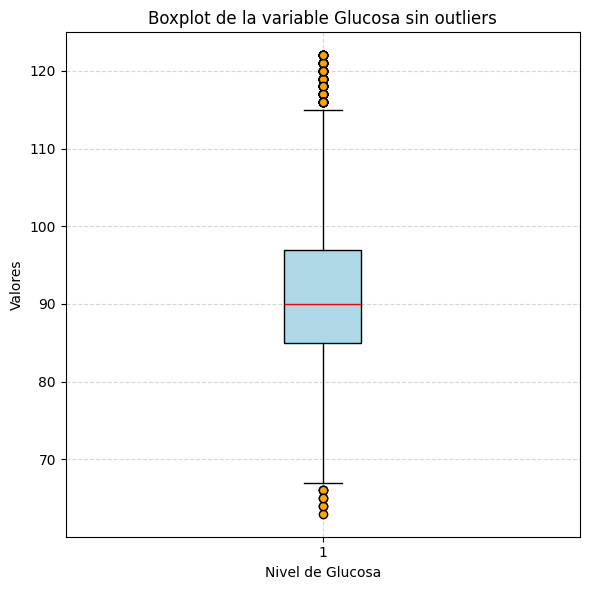

In [491]:
# <CODE>
# Seleccionar la variable a trabajar
variable = 'Glucosa'

# Eliminar datos faltantes en la variable
glucosa = ens[variable].dropna()

# Calcular cuartiles y IQR
q1 = glucosa.quantile(0.25)
q3 = glucosa.quantile(0.75)
iqr = q3 - q1

# Definir límites aceptables (sin outliers)
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Filtrar el DataFrame original eliminando los outliers
filtro_outliers = (ens[variable] >= limite_inferior) & (ens[variable] <= limite_superior)
ens_sin_outliers = ens[filtro_outliers].copy()

# Reportar cuántos registros se eliminaron
registros_eliminados = ens.shape[0] - ens_sin_outliers.shape[0]

# nuevo DataFrame sin outliers

print(f"Se eliminaron {registros_eliminados} registros con valores atípicos en la variable '{variable}'.")

# boxplot
plt.figure(figsize=(6, 6))
plt.boxplot(ens_sin_outliers[variable], patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red'),
            flierprops=dict(markerfacecolor='orange', marker='o'))
plt.title(f"Boxplot de la variable {variable} sin outliers")
plt.xlabel("Nivel de Glucosa")
plt.ylabel("Valores")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




#### **Ejercicio 13** 
Calcule el porcentaje de datos que se encuentran dentro de 1, 2 y 3 desviaciones estándar alrededor de la mediana para una variable cuantitativa.

1. Utilice la variable Glucosa del conjunto de datos ENS.
2. Calcule la mediana y la desviación estándar de la variable.
3. Determine el porcentaje de datos que se encuentran en los siguientes rangos:
   - Entre mediana ± 1 desviación estándar
   - Entre mediana ± 2 desviaciones estándar
   - Entre mediana ± 3 desviaciones estándar
4. Comente: ¿la mayoría de los datos se concentran cerca de la mediana? ¿Es la distribución simétrica?



In [492]:
# <CODE>
# Variable a analizar
variable = 'Glucosa'

# Eliminar datos faltantes
glucosa = ens[variable].dropna()

# Calcular mediana y desviación estándar
mediana = glucosa.median()
desviacion = glucosa.std()

# Crear rangos
rangos = {
    "±1 SD": (mediana - desviacion, mediana + desviacion),
    "±2 SD": (mediana - 2*desviacion, mediana + 2*desviacion),
    "±3 SD": (mediana - 3*desviacion, mediana + 3*desviacion)
}

# Calcular porcentajes dentro de cada rango
for label, (lim_inf, lim_sup) in rangos.items():
    dentro_rango = glucosa[(glucosa >= lim_inf) & (glucosa <= lim_sup)]
    porcentaje = 100 * len(dentro_rango) / len(glucosa)
    print(f"Porcentaje de datos dentro de la mediana {label}: {porcentaje:.2f}%")

Porcentaje de datos dentro de la mediana ±1 SD: 91.83%
Porcentaje de datos dentro de la mediana ±2 SD: 95.49%
Porcentaje de datos dentro de la mediana ±3 SD: 97.28%


#### **Ejercicio 14** 
Analice la relación entre los niveles de Glucosa y la Hemoglobina Glicosilada (HbA1c) mediante los coeficientes de correlación de Pearson y Spearman.

1. Utilice las siguientes variables del conjunto de datos ENS:
   - `Glucosa`: representa la glicemia en ayunas (nivel de azúcar en sangre en un momento puntual).  
   - `aux_Hemoglobina_A1C`: corresponde a la Hemoglobina Glicosilada (HbA1c), que refleja el promedio de glucosa en sangre durante los últimos 2–3 meses.
2. Calcule:
   - El coeficiente de correlación de Pearson y su valor p (evalúa relaciones lineales).
   - El coeficiente de correlación de Spearman y su valor p (evalúa relaciones monótonas, no necesariamente lineales).
3. Compare y comente los resultados obtenidos:
   - ¿Existe una correlación fuerte, moderada o débil entre ambas variables?
   - ¿La relación es estadísticamente significativa?


In [493]:
# <CODE> Importar librerías para correlación
from scipy.stats import pearsonr, spearmanr


In [494]:
# <CODE>

# Variables a analizar
x = 'Glucosa'
y = 'aux_Hemoglobina_A1C'

# Eliminar datos faltantes
datos = ens[[x, y]].dropna()

# Calcular correlaciones
pearson_corr, p_pearson = pearsonr(datos[x], datos[y])
spearman_corr, p_spearman = spearmanr(datos[x], datos[y])

# Mostrar resultados
print(f"Correlación de Pearson entre {x} y {y}: {pearson_corr:.3f} (p = {p_pearson:.8f})")
print(f"Correlación de Spearman entre {x} y {y}: {spearman_corr:.3f} (p = {p_spearman:.8f})")



Correlación de Pearson entre Glucosa y aux_Hemoglobina_A1C: 0.847 (p = 0.00000000)
Correlación de Spearman entre Glucosa y aux_Hemoglobina_A1C: 0.688 (p = 0.00000000)


#### **Ejercicio 15** 
Visualice la relación entre variables cuantitativas mediante gráficos de dispersión utilizando matplotlib.

1. Realice un scatter plot entre las variables:
   - Glucosa
   - Hemoglobina Glicosilada (aux_Hemoglobina_A1C)

Agregue una línea de ajuste lineal sobre los puntos.

2. Genere una matriz de dispersión (scatter plot matrix) entre las siguientes variables:
   - Glucosa
   - Hemoglobina Glicosilada (aux_Hemoglobina_A1C)
   - IMC
   - Edad



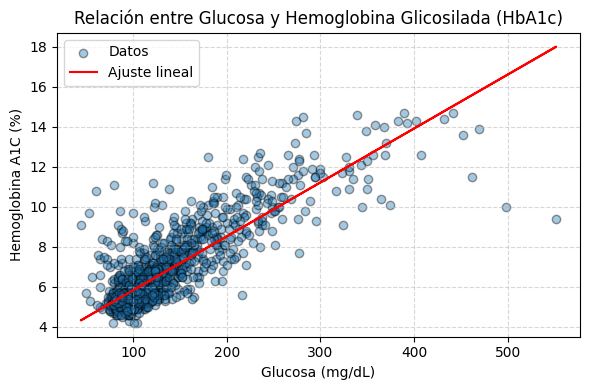

In [495]:
# <CODE> Scatter plot

# Variables
x = ens['Glucosa']
y = ens['aux_Hemoglobina_A1C']

# Eliminar valores faltantes
mask = x.notna() & y.notna()
x = x[mask]
y = y[mask]

# Ajuste lineal (regresión)
coef = np.polyfit(x, y, deg=1)  # Coeficientes de ajuste lineal
linea = np.poly1d(coef)         # Función ajustada

# Gráfico de dispersión
plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.4, edgecolors='k', label='Datos')
plt.plot(x, linea(x), color='red', label='Ajuste lineal')
plt.title("Relación entre Glucosa y Hemoglobina Glicosilada (HbA1c)")
plt.xlabel("Glucosa (mg/dL)")
plt.ylabel("Hemoglobina A1C (%)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

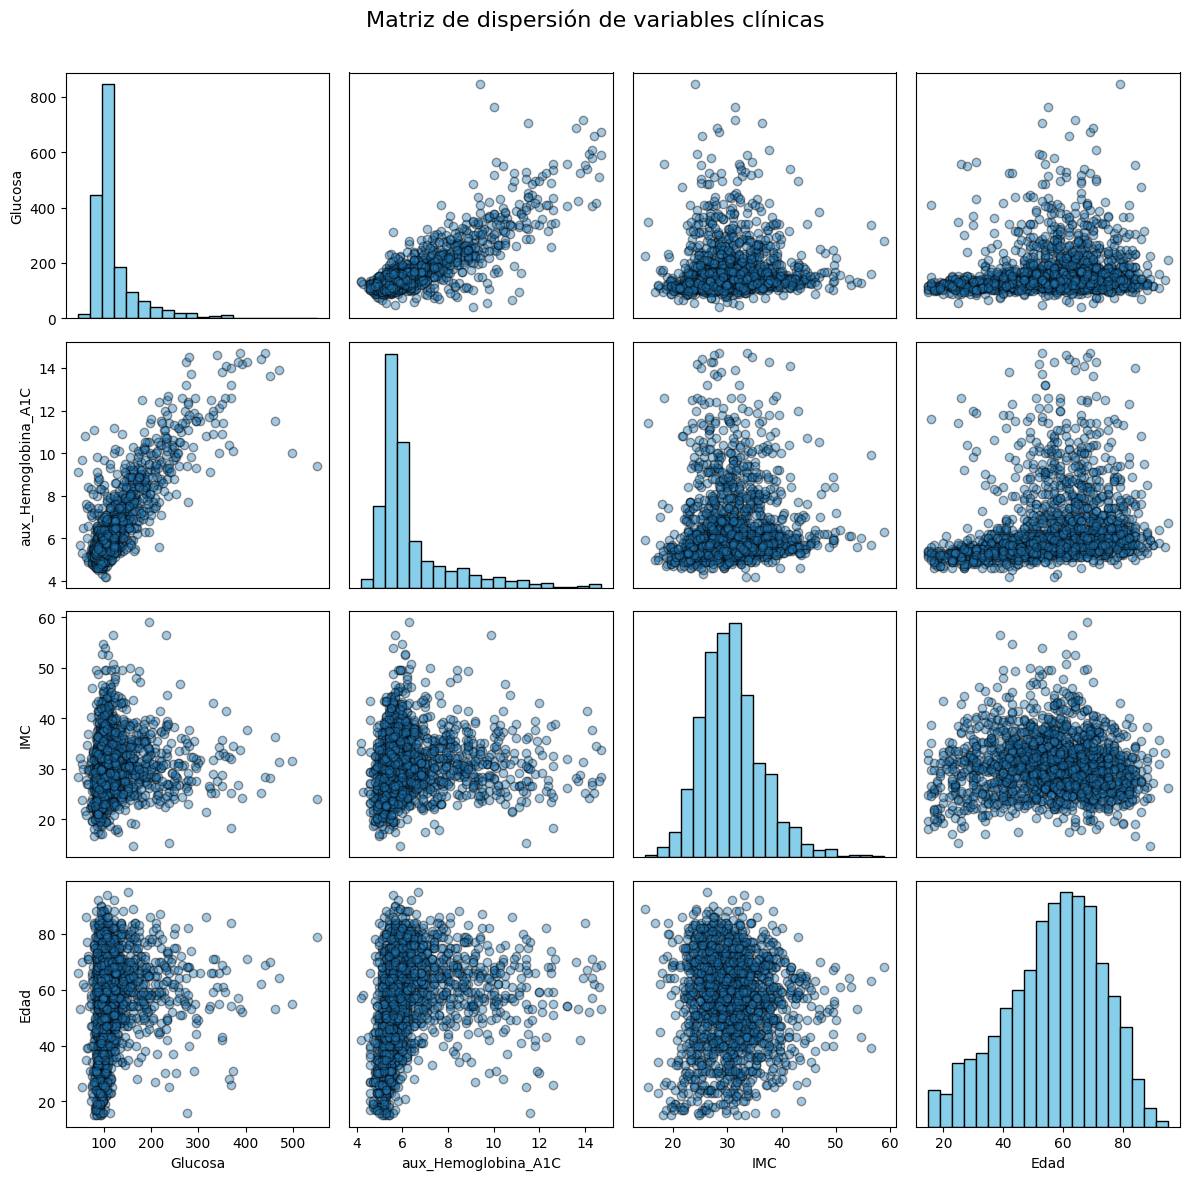

In [496]:
# <CODE> Matriz de dispersión

# Variables clínicas seleccionadas
variables = ['Glucosa', 'aux_Hemoglobina_A1C', 'IMC', 'Edad']

# Filtrar dataset eliminando filas con NA
datos = ens[variables].dropna()

# Crear matriz de gráficos de dispersión
n = len(variables)
fig, axes = plt.subplots(n, n, figsize=(12, 12))
fig.suptitle("Matriz de dispersión de variables clínicas", fontsize=16)

for i in range(n):
    for j in range(n):
        ax = axes[i, j]
        if i == j:
            # Histograma en la diagonal
            ax.hist(datos[variables[i]], bins=20, color='skyblue', edgecolor='black')
            ax.set_ylabel('')
        else:
            ax.scatter(datos[variables[j]], datos[variables[i]], alpha=0.4, edgecolors='k')
        
        if i == n - 1:
            ax.set_xlabel(variables[j])
        else:
            ax.set_xticks([])

        if j == 0:
            ax.set_ylabel(variables[i])
        else:
            ax.set_yticks([])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## 5. Modelamiento estadístico

En esta sección, abordaremos técnicas de modelamiento estadístico utilizadas en el análisis de datos en salud pública y epidemiología. Nos centraremos en dos tipos de regresión ampliamente usados: regresión lineal (simple y múltiple) y regresión logística. Estos métodos permiten cuantificar relaciones entre variables, hacer predicciones y generar evidencia para apoyar decisiones clínicas o de políticas públicas.



#### **Ejercicio 16** 

Analice la relación entre la edad y los niveles de Glucosa en la población.

1. Ajuste un modelo de regresión lineal simple, donde la variable dependiente sea Glucosa y la variable independiente sea Edad.
2. Calcule el intercepto y el coeficiente de regresión, así como el valor p asociado.
3. Interprete los resultados obtenidos:
   - ¿Qué indica el signo del coeficiente?
   - ¿El modelo es estadísticamente significativo?
4. Genere un gráfico de dispersión con la línea de regresión ajustada para visualizar la relación entre Edad y Glucosa.

In [497]:
# Librerias necesarias
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


Pendiente (coeficiente β1): 0.4261
Intercepto (β0): 79.1428
R²: 0.0502


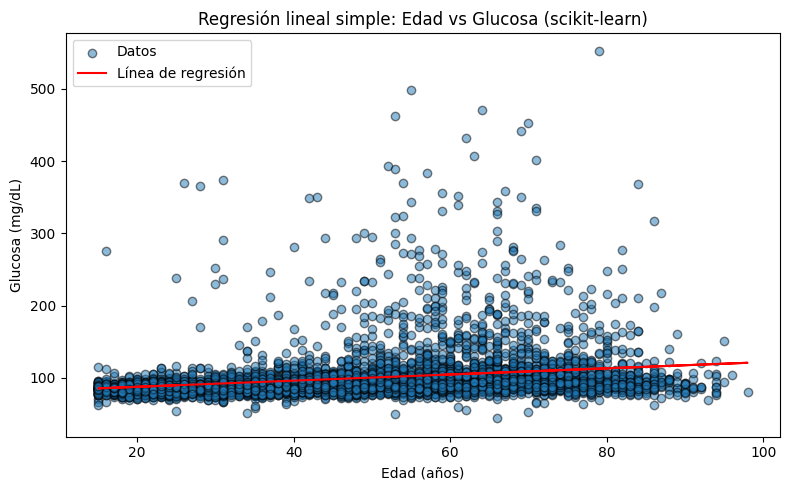

In [498]:
# <CODE>

# Eliminar filas con valores faltantes
df_simple = ens[['Edad', 'Glucosa']].dropna()

# Definir variables X (independiente) y y (dependiente)
X = df_simple[['Edad']]  # sklearn espera una matriz bidimensional
y = df_simple['Glucosa']

# Ajustar el modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Obtener valores
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_

# Realizar predicciones
y_pred = modelo.predict(X)

# Calcular R²
r2 = r2_score(y, y_pred)

# Mostrar resultados
print(f"Pendiente (coeficiente β1): {pendiente:.4f}")
print(f"Intercepto (β0): {intercepto:.4f}")
print(f"R²: {r2:.4f}")

# Crear gráfico
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.5, edgecolor='k', label="Datos")
plt.plot(X, y_pred, color='red', label="Línea de regresión")
plt.title("Regresión lineal simple: Edad vs Glucosa (scikit-learn)")
plt.xlabel("Edad (años)")
plt.ylabel("Glucosa (mg/dL)")
plt.legend()
plt.tight_layout()
plt.show()

#### **Ejercicio 17** 

Construya un modelo de regresión múltiple para predecir los niveles de Glucosa utilizando:
- Edad (numérica)
- IMC (numérica)
- Zona (categórica: urbana/rural)

1. Convierta la variable Zona a formato numérico mediante la codificación dummy (0 = Rural, 1 = Urbano, por ejemplo).
2. Ajuste una regresión lineal múltiple con las tres variables independientes.
3. Calcule los coeficientes estimados y sus valores p.
4. Interprete en términos prácticos la influencia de vivir en zona urbana sobre los niveles de glucosa.

In [499]:
# <CODE> 1. Convierta la variable Zona a formato numérico mediante la codificación dummy 

# Seleccionar las variables relevantes y eliminar filas con NA
df = ens[['Edad', 'IMC', 'Zona', 'Glucosa']].dropna()

# Codificar la variable categórica Zona (1 = Urbana, 0 = Rural)
df = pd.get_dummies(df, columns=['Zona'], drop_first=True)
# Ahora existe la columna 'Zona_Urbana'

# Variables predictoras (X) y variable objetivo (y)
X = df[['Edad', 'IMC', 'Zona_URBANA']]
y = df['Glucosa']

In [500]:
# <CODE> 2. Ajustar modelo con sklearn
modelo = LinearRegression()
modelo.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [501]:
# <CODE> 3. Obtener coeficientes y R²
coefs = modelo.coef_
intercepto = modelo.intercept_
y_pred = modelo.predict(X)

# Mostrar resultados de sklearn
print("=== Resultados de sklearn ===")
for nombre, coef in zip(X.columns, coefs):
    print(f"{nombre}: {coef:.4f}")
print(f"Intercepto: {intercepto:.4f}")
print(f"R²: {r2_score(y, y_pred):.4f}")

=== Resultados de sklearn ===
Edad: 0.4046
IMC: 0.9369
Zona_URBANA: 0.6334
Intercepto: 52.5356
R²: 0.0723


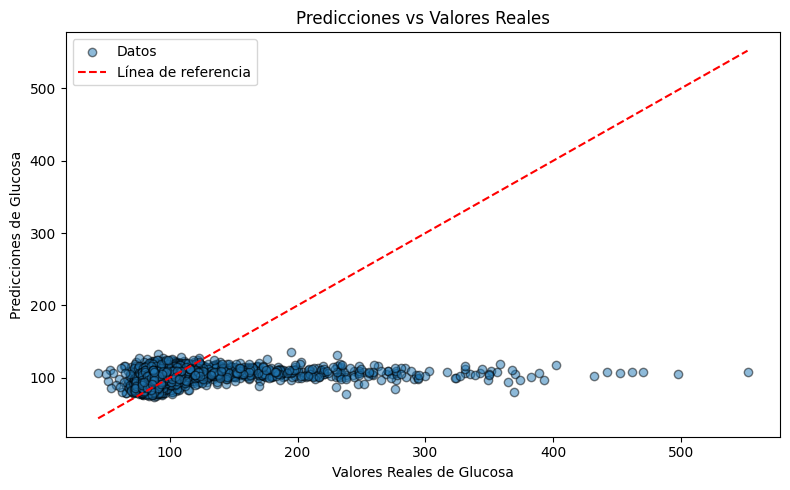

In [502]:
# <CODE> Plot
plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred, alpha=0.5, edgecolor='k', label="Datos")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label="Línea de referencia")

plt.title("Predicciones vs Valores Reales")
plt.xlabel("Valores Reales de Glucosa")         
plt.ylabel("Predicciones de Glucosa")
plt.legend()
plt.tight_layout()
plt.show()

#### **Ejercicio 18** 

Utilizando el modelo ajustado en el ejercicio anterior:

1. Obtenga los residuos del modelo.
2. Genere un histograma de los residuos para observar la distribución.
3. Genere un gráfico Q-Q (Quantile-Quantile plot) para verificar si los residuos se distribuyen normalmente.
4. Comente:
   - ¿Los residuos parecen seguir una distribución normal?
   - ¿Se observan valores extremos o asimetría?

HINT: Puede utilizar la librería `statsmodels` para realizar el Q-Q plot.

In [503]:
# <CODE> Instalar librerias necesarias
!pip install statsmodels

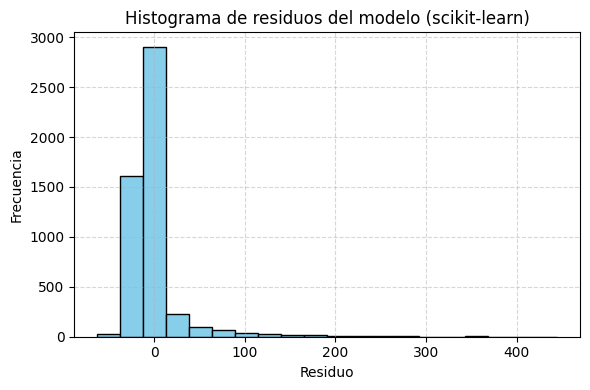

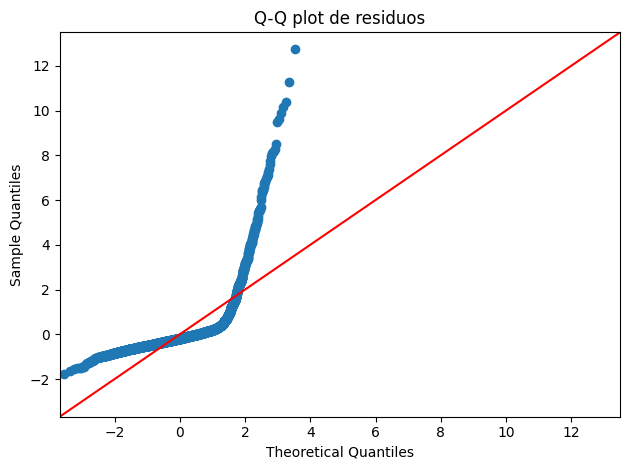

In [504]:
# <CODE> 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import pandas as pd

# 1. Preparar los datos (mismos que en el Ejercicio 17)
df = ens[['Edad', 'IMC', 'Zona', 'Glucosa']].dropna()
df = pd.get_dummies(df, columns=['Zona'], drop_first=True)  # Codificación dummy

X = df[['Edad', 'IMC', 'Zona_URBANA']]
y = df['Glucosa']

# 2. Ajustar el modelo con scikit-learn
modelo = LinearRegression()
modelo.fit(X, y)

# 3. Calcular predicciones y residuos
y_pred = modelo.predict(X)
residuos = y - y_pred

# 4. Generar histograma de los residuos
plt.figure(figsize=(6, 4))
plt.hist(residuos, bins=20, edgecolor='black', color='skyblue')
plt.title("Histograma de residuos del modelo (scikit-learn)")
plt.xlabel("Residuo")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 5. Gráfico Q-Q de residuos
sm.qqplot(residuos, line='45', fit=True)
plt.title("Q-Q plot de residuos")
plt.tight_layout()
plt.show()

#### **Ejercicio 19** 

Con el modelo múltiple ajustado previamente, realice predicciones bajo un caso hipotético:

1. Suponga un individuo con las siguientes características:
   - Edad: 55 años
   - IMC: 27.3
   - Zona: Urbana
2. Use la ecuación del modelo para estimar su nivel de Glucosa.
3. Interprete la predicción:
   - ¿Está dentro del rango típico de glucosa?
   - ¿Qué impacto tiene vivir en zona urbana en esta estimación?

In [505]:
# <CODE>
# Datos y codificación dummy
df = ens[['Edad', 'IMC', 'Zona', 'Glucosa']].dropna()
df = pd.get_dummies(df, columns=['Zona'], drop_first=True)

# Separar variables independientes y dependiente
X = df[['Edad', 'IMC', 'Zona_URBANA']]
y = df['Glucosa']

# Ajustar modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Crear caso hipotético
nuevo_individuo = pd.DataFrame({
    'Edad': [55],
    'IMC': [27.3],
    'Zona_URBANA': [1]
})

# Predecir glucosa
glucosa_predicha = modelo.predict(nuevo_individuo)
print(f"Predicción del nivel de Glucosa: {glucosa_predicha[0]:.2f} mg/dL")

Predicción del nivel de Glucosa: 101.00 mg/dL


#### **Ejercicio 20** 

Cree un modelo de regresión logística para predecir la probabilidad de tener diabetes utilizando como variables:

- Edad (numérica)
- IMC (numérica)
- Glucosa (numérica)
- Zona (categórica)

1. Use la variable binaria `di3` (diabetes) como variable dependiente
2. Realice la codificación dummy de la variable Zona.
3. Ajuste un modelo de regresión logística e interprete:
   - Los coeficientes estimados (log odds)
   - Los odds ratios (exp(coef))
   - Los valores p
4. Calcule la probabilidad estimada de tener diabetes para un caso hipotético con las siguientes características:
   - Edad: 60 años
   - IMC: 28
   - Glucosa: 130 y 200
   - Zona: Urbana

In [510]:
# <CODE>
from sklearn.linear_model import LogisticRegression


# 1. Preparar los datos
variables = ['Edad', 'IMC', 'Glucosa', 'Zona', 'di3']
df = ens[variables].dropna()

# 2. Filtrar valores válidos para la variable binaria 'di3' (0 = No, 1 = Sí)
df = df[df['di3'].isin(['NO', 'SÍ'])]

# 3. Codificación dummy para Zona
df = pd.get_dummies(df, columns=['Zona'], drop_first=True)

# 4. Definir variables predictoras y variable objetivo
X = df[['Edad', 'IMC', 'Glucosa', 'Zona_URBANA']]
y = df['di3']


# 5. Ajustar modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X, y)

# 6. Mostrar coeficientes estimados (log odds)
print("Coeficientes (log-odds):")
for feature, coef in zip(X.columns, modelo.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# 7. Calcular odds ratios
odds_ratios = np.exp(modelo.coef_[0])
print("\nOdds Ratios:")
for feature, or_ in zip(X.columns, odds_ratios):
    print(f"{feature}: {or_:.4f}")

# 8. Predicción con un caso hipotético
# Ejemplo: Edad = 60, IMC = 28, Glucosa = 130, Zona = Urbana
nuevo_caso = pd.DataFrame({
    'Edad': [60],
    'IMC': [28],
    'Glucosa': [130],
    'Zona_URBANA': [1]
})

# Calcular probabilidad estimada
proba = modelo.predict_proba(nuevo_caso)[0][1]  # Probabilidad clase 1 (diabetes)
print(f"\nProbabilidad estimada de tener diabetes: {proba:.4f}")



# Ejemplo: Edad = 60, IMC = 28, Glucosa = 200, Zona = Urbana
nuevo_caso = pd.DataFrame({
    'Edad': [60],
    'IMC': [28],
    'Glucosa': [200],
    'Zona_URBANA': [1]
})

# Calcular probabilidad estimada
proba = modelo.predict_proba(nuevo_caso)[0][1]  # Probabilidad clase 1 (diabetes)
print(f"\nProbabilidad estimada de tener diabetes: {proba:.4f}")

Coeficientes (log-odds):
Edad: 0.0330
IMC: 0.0551
Glucosa: 0.0291
Zona_URBANA: 0.1580

Odds Ratios:
Edad: 1.0336
IMC: 1.0567
Glucosa: 1.0295
Zona_URBANA: 1.1712

Probabilidad estimada de tener diabetes: 0.2737

Probabilidad estimada de tener diabetes: 0.7423
